In [9]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The program is used for result visulization and top user analysis.

This part is used for findout the most influential users according to the database

In [10]:
# Read the all comment data file from 03
Result_df = pd.read_csv("./processed-twitter-comment-2/all_sa_comment.csv", header=None)

In [11]:
Result_df.columns=['#','text','author_id','username','retweet','reply','like','quote','bookmark','lower','sentiment']

# Remove unkinown author comments from the dataframe
Result_df = Result_df[Result_df.username != '**this tweet had been deleted or hidden**']
Result_df = Result_df[Result_df.sentiment != 'sentiment']
#Result_df.drop(index=0)
Result_df.head(5)

,#,text,author_id,username,retweet,reply,like,quote,bookmark,lower,sentiment
1,0.0,RT @CLIPSC0: Imagine being up 19 lives and fol...,1885308679,CLIPSC0,6,0,0,0,0,rt clipsc0 imagine being up 19 lives and fol...,Neutral
2,1.0,RT @alexgscod: Tired Soap 🧼❤️💀\n\n#GhostSoap #...,1429231230738862080,alexgscod,81,0,0,0,0,rt alexgscod tired soap ghostsoap soapghos...,Negative
3,2.0,Holding it Down… 🫳 #clutch ⚙️🤏\n (All the...,1440699372929372169,EliteWGaming,1,2,2,1,0,holding it down clutch all the ...,Neutral
5,4.0,"RT @xbruised_peachx: shh, he's trying to expla...",1285568479274209291,xbruised_peachx,52,0,0,0,0,rt xbruised peachx shh he s trying to expla...,Irrelevant
6,5.0,RT @artimaaaeus: rudy dood? rudy dood 💙\n---\n...,1022141717787504640,artimaaaeus,96,0,0,0,0,rt artimaaaeus rudy dood rudy dood callofd...,Neutral


In [12]:
# Get the 20 most influential users based on the number of tweets they have posted and print their names

user_df = Result_df["username"].value_counts()
#user_df.columns=['username','tweets']
#display(user_df)
top20user_data_df = user_df.head(20)
display(top20user_data_df)


AmikoRoyAi         338
loneghostwolf88    312
CallofDuty         214
BettyBRenders      213
PlayCODMobile      200
artimaaaeus        194
yumecore           164
661ave             146
alexgscod          139
Hopefulonion        71
lilindermile        69
MrTLexify           62
xbruised_peachx     60
YouTube             55
tb_png              47
Activision          46
HellishDraws        46
CODLeague           40
lexiissgone         37
CODmwfeed           35
Name: username, dtype: int64

In [13]:
# calculate the average retweet and average like amount for each user

top20_list = ['AmikoRoyAi','loneghostwolf88','CallofDuty','BettyBRenders','PlayCODMobile','artimaaaeus','yumecore','661ave','alexgscod','Hopefulonion','lilindermile','MrTLexify','xbruised_peachx','YouTube','tb_png','Activision','HellishDraws','CODLeague','lexiissgone','CODmwfeed']
data1 = Result_df[Result_df['username'].isin(top20_list)]
#data1 = Result_df[Result_df['author_id'].isin(top20_list)]
#data2 = Result_df[Result_df['username'] =='loneghostwolf88']
#tweet_list_length = len(data2) 
top20_list_length = len(top20_list) 
#data2.drop('Unnamed: 0')
#display(data2)
avgretweet_list  = []
avglike_list = []
totalretweet_list = []
totallike_list = []


for x in range(top20_list_length):
    sp_df = Result_df[Result_df['username'] == top20_list[x]]
    #sp_df = Result_df[Result_df['author_id'] == top20_list[x]]
    tweet_list_length = len(sp_df)
    total_retweet_count = 0
    total_like_count = 0
    
    
    for x in range(tweet_list_length):
        retweet_count = int(sp_df.retweet.values[x])
        like_count = int(sp_df.like.values[x])
        total_retweet_count = total_retweet_count + retweet_count
        total_like_count = total_like_count + like_count
        
    sp_avgretweet = total_retweet_count / tweet_list_length
    sp_avglike = total_like_count / tweet_list_length
    avgretweet_list.append(sp_avgretweet)
    avglike_list.append(sp_avglike)
    totalretweet_list.append(total_retweet_count)
    totallike_list.append(total_like_count)

    
## final output
final_df = pd.DataFrame({'username': top20_list,'avg_retweet':avgretweet_list,'avg_like':avglike_list,'total_retweet':totalretweet_list,'total_like':totallike_list})
final_df.columns = ['username','avg_retweet','avg_like','total_retweet','total_like']
#print(int(data2.retweet.values[169]) + int(data2.retweet.values[0]))
print(final_df)

           username  avg_retweet  avg_like  total_retweet  total_like
0        AmikoRoyAi   908.831361  0.000000         307185           0
1   loneghostwolf88   197.814103  0.000000          61718           0
2        CallofDuty   317.018692  0.542056          67842         116
3     BettyBRenders   272.300469  0.000000          58000           0
4     PlayCODMobile    14.055000  1.690000           2811         338
5       artimaaaeus   340.231959  0.000000          66005           0
6          yumecore   172.353659  0.000000          28266           0
7            661ave   473.636986  0.000000          69151           0
8         alexgscod   412.683453  0.000000          57363           0
9      Hopefulonion   539.366197  0.000000          38295           0
10     lilindermile   786.623188  0.000000          54277           0
11        MrTLexify  1324.000000  0.000000          82088           0
12  xbruised_peachx   177.316667  0.000000          10639           0
13          YouTube 

In [14]:
# save the top 20 users information to a CSV file
final_df.to_csv('top20_user_count.csv')

This part is to plot the word cloud figure according to the comment of one day

In [15]:
# build stop words list
interrupt_word_list = ['rt','http','https','callofduty','mwii','mw2']
stopwords_nltk = nltk.corpus.stopwords
stop_words_list = stopwords_nltk.words('english')
#stop_words_list = stop_words_list.concat(interrupt_word_list)

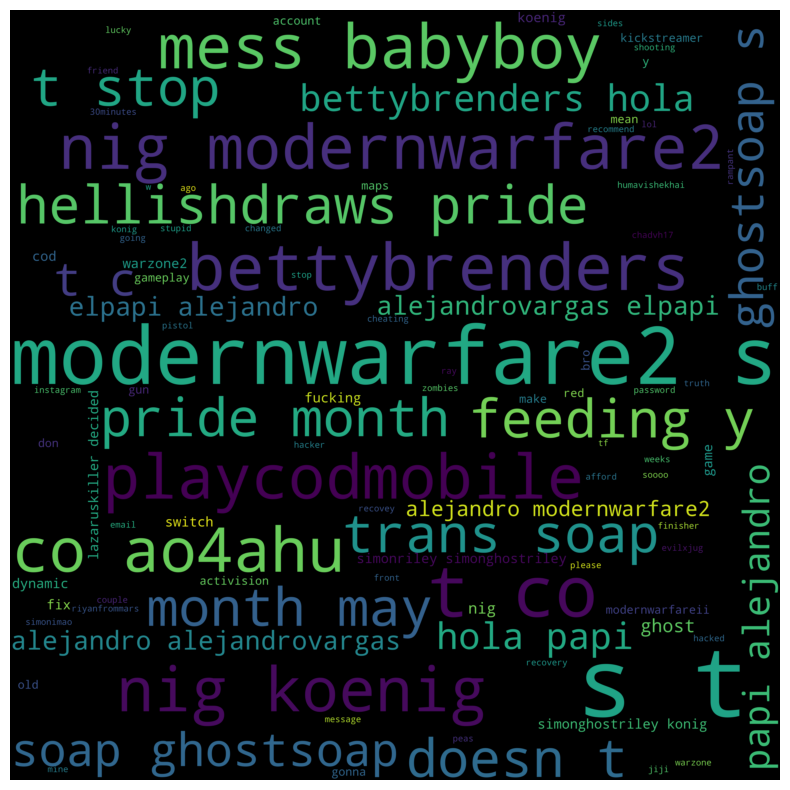

In [16]:
# user need to manually change the Result_df path to plot different dates Word cloud figure
Result_df = pd.read_csv("./mwii-twitter-comment-3/07_08_comment_sa.csv", header=None) 
Result_df.columns=['#','author_id','text','username','retweet','reply','like','quote','bookmark','lower','sentiment']

for wrds in interrupt_word_list:
    Result_df["lower"]=Result_df.lower.apply(lambda x: re.sub(wrds, ' ', x))

word_cloud_text = ''.join(Result_df[Result_df["sentiment"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

#Figure properties
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# save the word cloud figure
fig.savefig('wordcloud0708.png',bbox_inches='tight')